In [93]:
## Importing lib 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
auto=pd.read_csv('auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Step 1 : Data Cleaning

In [3]:
print(auto.shape)

(398, 9)


In [4]:
#cheking for null values 

auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
## data all clean

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
# check for horspower

pd.set_option('display.max_rows', None)

auto.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
70     12
67     12
105    12
65     10
97      9
85      9
80      7
145     7
140     7
?       6
72      6
78      6
68      6
92      6
84      6
130     5
71      5
175     5
115     5
60      5
180     5
86      5
170     5
120     4
165     4
83      4
52      4
76      4
69      3
63      3
190     3
74      3
225     3
215     3
96      3
48      3
125     3
112     3
79      2
160     2
81      2
58      2
198     2
155     2
53      2
129     2
98      2
46      2
153     2
62      2
87      2
139     2
54      1
132     1
142     1
200     1
208     1
82      1
193     1
137     1
89      1
77      1
113     1
49      1
91      1
107     1
138     1
220     1
64      1
133     1
103     1
210     1
158     1
149     1
102     1
167     1
108     1
152     1
94      1
61      1
66      1
122     1
135     1
148     1
93      1
230     1
116     1
Name: horsepower, dtype: int64

In [18]:
auto=auto[-(auto.horsepower=='?')]

In [19]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [20]:
auto.shape

(392, 9)

In [25]:
auto.horsepower=auto.horsepower.astype('int')

In [26]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [27]:
## all datatype cleaned and performed well on dataset 

In [28]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Step 2 : Data Visulization 

In [29]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

In [31]:
auto['brand'] = [auto_misspelled[key].title() if key in auto_misspelled else \
               key.title() for key in [i.split()[0] for i in auto['car name']]]

auto['name'] = [' '.join(i.split()[1:]).title() for i in auto['car name']]
auto = auto.drop(columns = 'car name', axis = 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino


In [32]:
auto.brand.value_counts()

Ford          48
Chevrolet     47
Plymouth      31
Dodge         28
Amc           27
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Peugeot        8
Fiat           8
Audi           7
Volvo          6
Chrysler       6
Opel           4
Subaru         4
Saab           4
Mercedes       3
Renault        3
Bmw            2
Cadillac       2
Capri          1
Harvester      1
Nissan         1
Triumph        1
Name: brand, dtype: int64

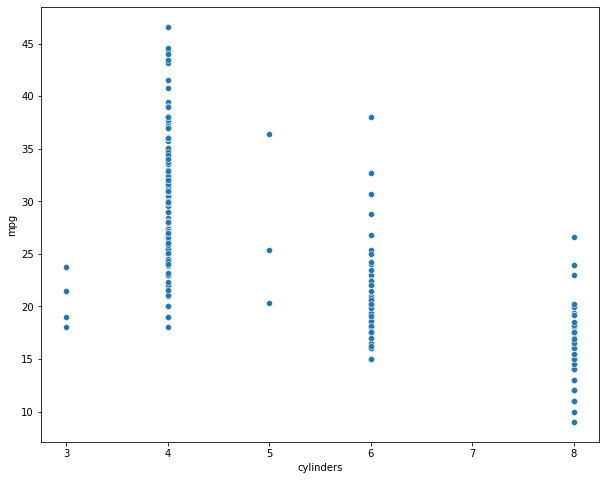

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=auto.cylinders,y=auto.mpg)
plt.show()

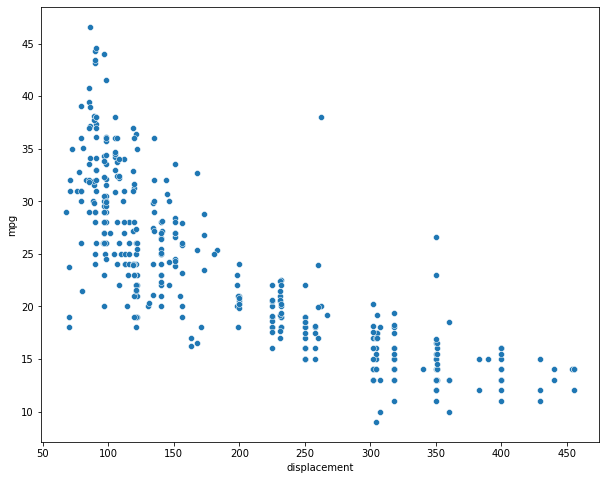

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=auto.displacement,y=auto.mpg)
plt.show()

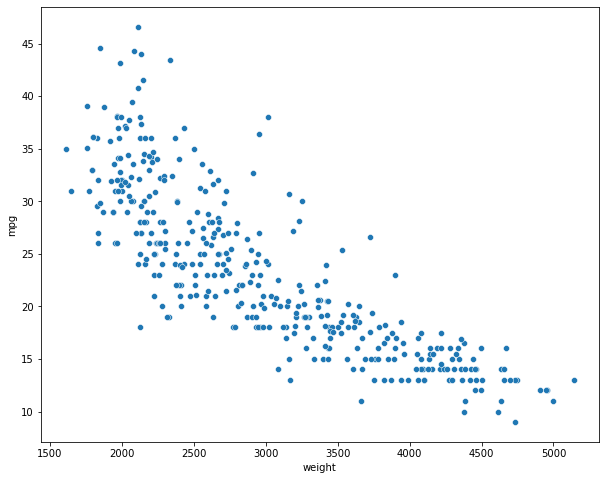

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=auto.weight	,y=auto.mpg)
plt.show()

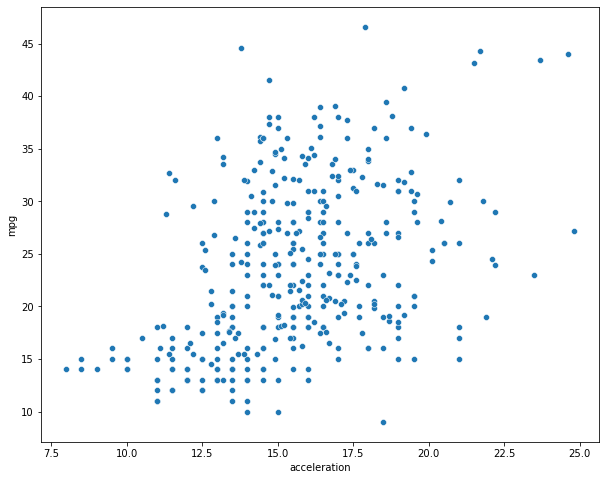

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=auto.acceleration,y=auto.mpg)
plt.show()

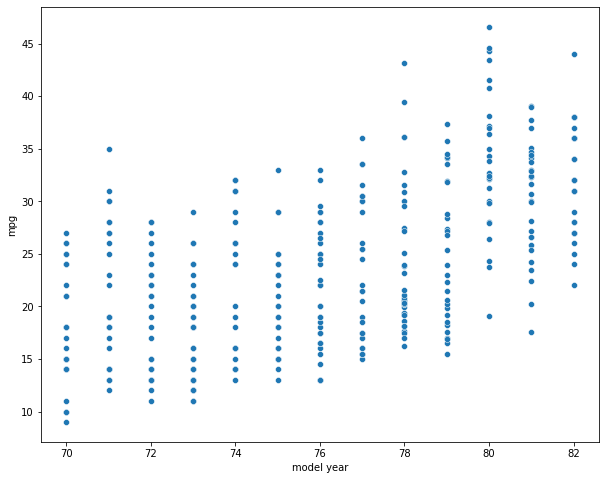

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=auto['model year'],y=auto.mpg)
plt.show()

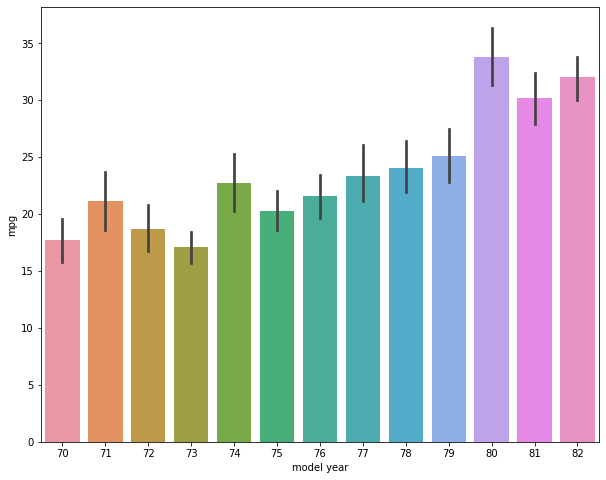

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x=auto['model year'],y=auto.mpg)
plt.show()

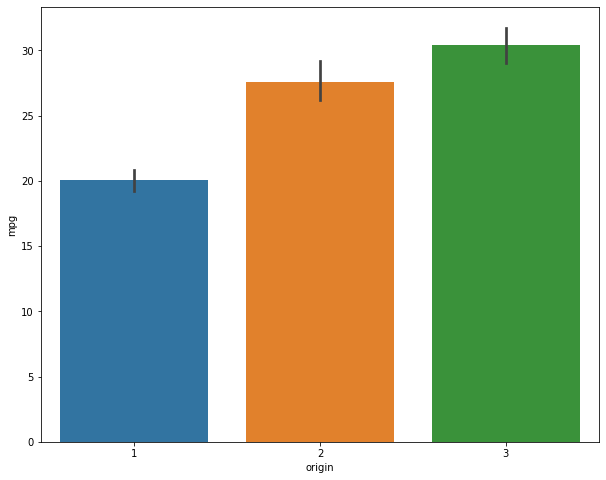

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x=auto['origin'],y=auto.mpg)
plt.show()
#origin

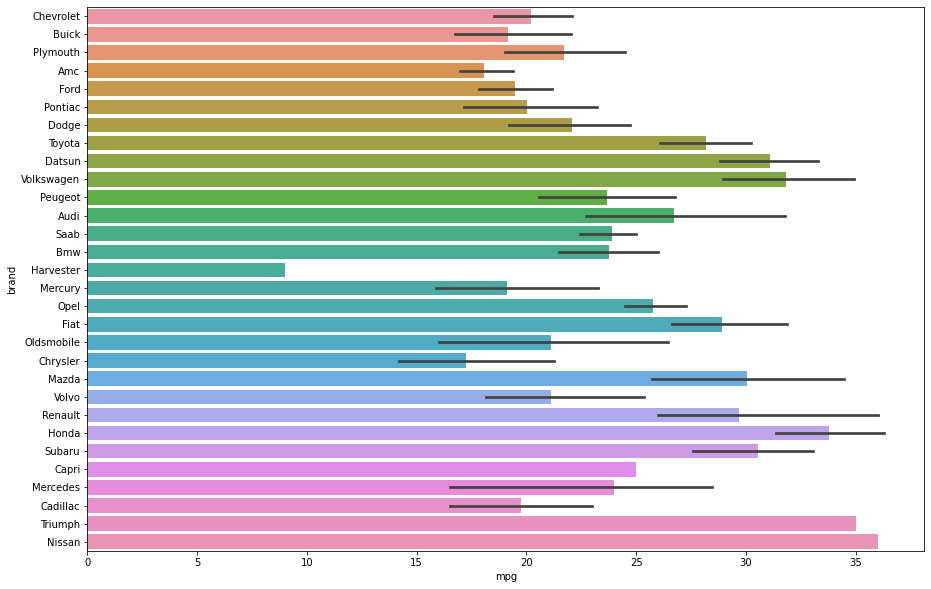

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(y=auto['brand'],x=auto.mpg,orient='h')
plt.show()
#brand

### inference From EDA

1. strong negative correlation with weight and displacement 
2. light +ve correlation with accelartion 
3. Nissan have highest mean mileadge in among their peers

# Step 3 : Data Prep

In [54]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino


In [55]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [70]:
status=pd.get_dummies(auto.brand)
status.shape

(392, 30)

In [74]:
auto=pd.concat([auto,status],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name,...,Peugeot,Plymouth,Pontiac,Renault,Saab,Subaru,Toyota,Triumph,Volkswagen,Volvo
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino,...,0,0,0,0,0,0,0,0,0,0


In [81]:
auto.drop(['brand','name'],inplace=True,axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Amc,Audi,...,Peugeot,Plymouth,Pontiac,Renault,Saab,Subaru,Toyota,Triumph,Volkswagen,Volvo
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Amc', 'Audi', 'Bmw', 'Buick',
       'Cadillac', 'Capri', 'Chevrolet', 'Chrysler', 'Datsun', 'Dodge', 'Fiat',
       'Ford', 'Harvester', 'Honda', 'Mazda', 'Mercedes', 'Mercury', 'Nissan',
       'Oldsmobile', 'Opel', 'Peugeot', 'Plymouth', 'Pontiac', 'Renault',
       'Saab', 'Subaru', 'Toyota', 'Triumph', 'Volkswagen', 'Volvo'],
      dtype='object')

In [85]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.8, test_size = 0.2, random_state = 100)

In [86]:
scaler = MinMaxScaler()

In [87]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','model year','origin']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

<ipython-input-87-eaa457c94892>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Amc,Audi,...,Peugeot,Plymouth,Pontiac,Renault,Saab,Subaru,Toyota,Triumph,Volkswagen,Volvo
342,0.558511,0.2,0.173127,0.206522,0.228132,0.291667,0.916667,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
331,0.659574,0.2,0.074935,0.114130,0.157210,0.595238,0.833333,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
357,0.635638,0.2,0.131783,0.293478,0.296099,0.404762,0.916667,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0.771277,0.2,0.095607,0.092391,0.151300,0.398810,1.000000,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
306,0.526596,0.6,0.271318,0.375000,0.290189,0.196429,0.750000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Amc,Audi,...,Peugeot,Plymouth,Pontiac,Renault,Saab,Subaru,Toyota,Triumph,Volkswagen,Volvo
342,0.558511,0.2,0.173127,0.206522,0.228132,0.291667,0.916667,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
331,0.659574,0.2,0.074935,0.114130,0.157210,0.595238,0.833333,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
357,0.635638,0.2,0.131783,0.293478,0.296099,0.404762,0.916667,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0.771277,0.2,0.095607,0.092391,0.151300,0.398810,1.000000,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
306,0.526596,0.6,0.271318,0.375000,0.290189,0.196429,0.750000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


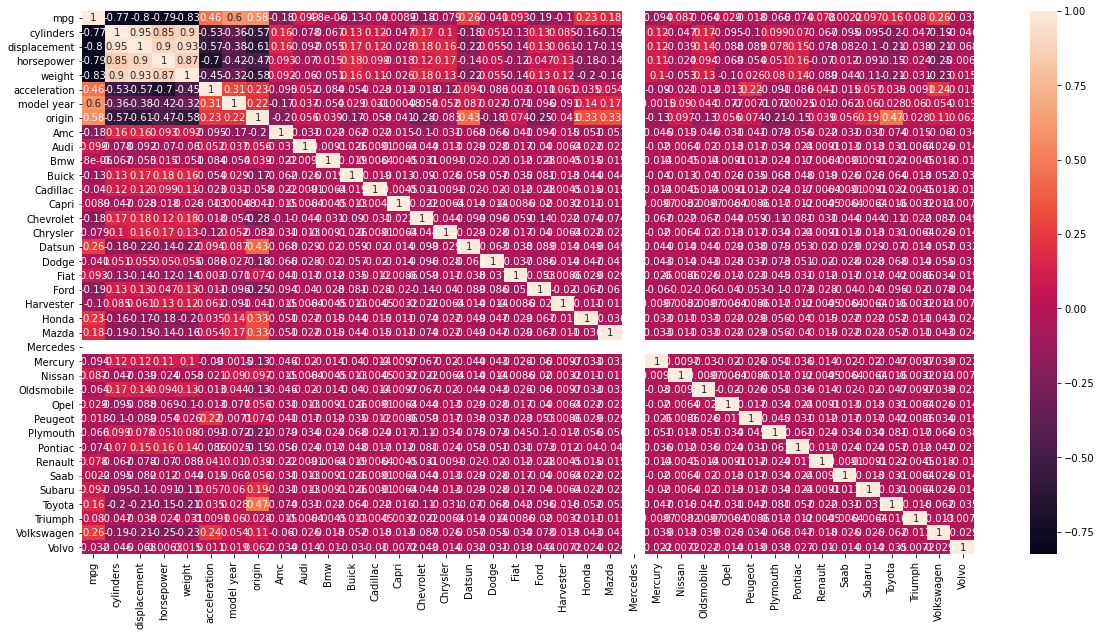

In [89]:
corr=df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

## highly correlated variable 

1. weight Vs Horsepower( 0.87 ) 
2. accelrtion vs horsepower (-0.7 )
3. horsepower vs displacement(0.9)
4. displacement vs weight(0.93)
5. weight vs cylinder (0.9)
6. cylinder vs hp (0.85)
7. cylinder vs displacement(0.95)

In [90]:
# hp -- 3
# WEIGHT --3 
#DISPL --3 
# ACC -- 1
# CYLIBDER --3 

# Step 4 : Model Building

In [91]:
X=df_train.drop('mpg',axis=1)
y=df_train.mpg

In [92]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Amc,Audi,Bmw,...,Peugeot,Plymouth,Pontiac,Renault,Saab,Subaru,Toyota,Triumph,Volkswagen,Volvo
342,0.2,0.173127,0.206522,0.228132,0.291667,0.916667,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331,0.2,0.074935,0.114130,0.157210,0.595238,0.833333,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
357,0.2,0.131783,0.293478,0.296099,0.404762,0.916667,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0.2,0.095607,0.092391,0.151300,0.398810,1.000000,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
306,0.6,0.271318,0.375000,0.290189,0.196429,0.750000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     44.93
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.86e-93
Time:                        12:13:53   Log-Likelihood:                 334.92
No. Observations:                 313   AIC:                            -599.8
Df Residuals:                     278   BIC:                            -468.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4567      0.039     11.808   

In [97]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
18,Fiat,inf
19,Ford,inf
21,Honda,inf
22,Mazda,inf
24,Mercury,inf
25,Nissan,inf
26,Oldsmobile,inf
27,Opel,inf
28,Peugeot,inf
29,Plymouth,inf


In [98]:
X=X.drop('displacement',axis=1)

X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     45.38
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           4.12e-93
Time:                        12:17:03   Log-Likelihood:                 331.81
No. Observations:                 313   AIC:                            -595.6
Df Residuals:                     279   BIC:                            -468.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4531      0.039     11.627   

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
18,Ford,inf
28,Plymouth,inf
21,Mazda,inf
23,Mercury,inf
24,Nissan,inf
25,Oldsmobile,inf
26,Opel,inf
27,Peugeot,inf
29,Pontiac,inf
19,Harvester,inf


In [100]:
X=X.drop('horsepower',axis=1)

X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     46.56
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.62e-93
Time:                        12:18:07   Log-Likelihood:                 330.67
No. Observations:                 313   AIC:                            -595.3
Df Residuals:                     280   BIC:                            -471.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4159      0.029     14.318   

In [101]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
17,Ford,inf
27,Plymouth,inf
20,Mazda,inf
22,Mercury,inf
23,Nissan,inf
24,Oldsmobile,inf
25,Opel,inf
26,Peugeot,inf
28,Pontiac,inf
18,Harvester,inf
